In [ ]:
#3)COLLECT THE DOUBLES COMPETITOR RANKINGS DATA FROM THE API ENDPOINTS-
https://developer.sportradar.com/tennis/reference/doubles-competitor-rankings

In [1]:
import requests

url = "https://api.sportradar.com/tennis/trial/v3/en/double_competitors_rankings.json?api_key=uTdw18HoNI3f8JZtcHNxtd8V1VxvGrIqQ9QoGh9y"
headers = {"accept": "application/json"}

response = requests.get(url, headers=headers)

print(response.text)

{"generated_at":"2025-04-16T05:01:41+00:00","rankings":[{"type_id":2,"name":"ATP","year":2025,"week":16,"gender":"men","competitor_rankings":[{"rank":1,"movement":0,"points":9440,"competitions_played":23,"competitor":{"id":"sr:competitor:49363","name":"Pavic, Mate","country":"Croatia","country_code":"HRV","abbreviation":"PAV"}},{"rank":1,"movement":0,"points":9440,"competitions_played":23,"competitor":{"id":"sr:competitor:51836","name":"Arevalo-Gonzalez, Marcelo","country":"El Salvador","country_code":"SLV","abbreviation":"ARE"}},{"rank":3,"movement":0,"points":7590,"competitions_played":26,"competitor":{"id":"sr:competitor:14898","name":"Heliovaara, Harri","country":"Finland","country_code":"FIN","abbreviation":"HEL"}},{"rank":4,"movement":0,"points":7590,"competitions_played":27,"competitor":{"id":"sr:competitor:637970","name":"Patten, Henry","country":"Great Britain","country_code":"GBR","abbreviation":"PAT"}},{"rank":5,"movement":0,"points":6460,"competitions_played":20,"competitor

In [2]:
data = response.json()

In [3]:
data['rankings'][0]#women wta inside that we have ['competitor_rankings']

{'type_id': 2,
 'name': 'ATP',
 'year': 2025,
 'week': 16,
 'gender': 'men',
 'competitor_rankings': [{'rank': 1,
   'movement': 0,
   'points': 9440,
   'competitions_played': 23,
   'competitor': {'id': 'sr:competitor:49363',
    'name': 'Pavic, Mate',
    'country': 'Croatia',
    'country_code': 'HRV',
    'abbreviation': 'PAV'}},
  {'rank': 1,
   'movement': 0,
   'points': 9440,
   'competitions_played': 23,
   'competitor': {'id': 'sr:competitor:51836',
    'name': 'Arevalo-Gonzalez, Marcelo',
    'country': 'El Salvador',
    'country_code': 'SLV',
    'abbreviation': 'ARE'}},
  {'rank': 3,
   'movement': 0,
   'points': 7590,
   'competitions_played': 26,
   'competitor': {'id': 'sr:competitor:14898',
    'name': 'Heliovaara, Harri',
    'country': 'Finland',
    'country_code': 'FIN',
    'abbreviation': 'HEL'}},
  {'rank': 4,
   'movement': 0,
   'points': 7590,
   'competitions_played': 27,
   'competitor': {'id': 'sr:competitor:637970',
    'name': 'Patten, Henry',
    'co

In [4]:
import requests

url = "https://api.sportradar.com/tennis/trial/v3/en/double_competitors_rankings.json?api_key=uTdw18HoNI3f8JZtcHNxtd8V1VxvGrIqQ9QoGh9y"
headers = {"accept": "application/json"}

response = requests.get(url, headers=headers)

if response.status_code == 200:
    try:
        data = response.json()

        ab = []
        auto_increment_id = 1

        #Iterate over rankings to extract the required data
        for ranking in data.get("rankings", []):
            for competitor_ranking in ranking.get("competitor_rankings", []):
                competitor = competitor_ranking.get("competitor", {})
                ab.append({
                    "rank_id": auto_increment_id,
                    "rank": competitor_ranking.get("rank"),
                    "movement": competitor_ranking.get("movement"),
                    "points": competitor_ranking.get("points"),
                    "competitions_played": competitor_ranking.get("competitions_played"),
                    "competitor_id": competitor.get("id"),
                    "name": competitor.get("name"),
                    "country": competitor.get("country"),
                    "week": ranking.get("week"),  # Adjusted to get 'week' from the parent ranking object
                    "country_code": competitor.get("country_code"),
                    "abbreviation": competitor.get("abbreviation"),
                })
                auto_increment_id += 1

        #Output the extracted data
        for item in ab:
            print(item)
    except Exception as e:
        print(f"Error processing data: {e}")
else:
    print(f"Failed to retrieve data. HTTP Status Code: {response.status_code}")


{'rank_id': 1, 'rank': 1, 'movement': 0, 'points': 9440, 'competitions_played': 23, 'competitor_id': 'sr:competitor:49363', 'name': 'Pavic, Mate', 'country': 'Croatia', 'week': 16, 'country_code': 'HRV', 'abbreviation': 'PAV'}
{'rank_id': 2, 'rank': 1, 'movement': 0, 'points': 9440, 'competitions_played': 23, 'competitor_id': 'sr:competitor:51836', 'name': 'Arevalo-Gonzalez, Marcelo', 'country': 'El Salvador', 'week': 16, 'country_code': 'SLV', 'abbreviation': 'ARE'}
{'rank_id': 3, 'rank': 3, 'movement': 0, 'points': 7590, 'competitions_played': 26, 'competitor_id': 'sr:competitor:14898', 'name': 'Heliovaara, Harri', 'country': 'Finland', 'week': 16, 'country_code': 'FIN', 'abbreviation': 'HEL'}
{'rank_id': 4, 'rank': 4, 'movement': 0, 'points': 7590, 'competitions_played': 27, 'competitor_id': 'sr:competitor:637970', 'name': 'Patten, Henry', 'country': 'Great Britain', 'week': 16, 'country_code': 'GBR', 'abbreviation': 'PAT'}
{'rank_id': 5, 'rank': 5, 'movement': 0, 'points': 6460, 'c

In [5]:
import pandas as pd
df=pd.DataFrame(ab)
df

,rank_id,rank,movement,points,competitions_played,competitor_id,name,country,week,country_code,abbreviation
0,1,1,0,9440,23,sr:competitor:49363,"Pavic, Mate",Croatia,16,HRV,PAV
1,2,1,0,9440,23,sr:competitor:51836,"Arevalo-Gonzalez, Marcelo",El Salvador,16,SLV,ARE
2,3,3,0,7590,26,sr:competitor:14898,"Heliovaara, Harri",Finland,16,FIN,HEL
3,4,4,0,7590,27,sr:competitor:637970,"Patten, Henry",Great Britain,16,GBR,PAT
4,5,5,0,6460,20,sr:competitor:87690,"Thompson, Jordan",Australia,16,AUS,THO
...,...,...,...,...,...,...,...,...,...,...,...
995,996,497,-2,126,15,sr:competitor:511932,"Kovaleva, Anastasia",Neutral,16,None,KOV
996,997,499,-2,125,9,sr:competitor:739667,"Pedone, Giorgia",Italy,16,ITA,PED
997,998,500,-2,125,3,sr:competitor:71730,"Kulikov, Angela",USA,16,USA,KUL
998,999,501,-2,125,12,sr:competitor:262701,"Hodzic, Mina",Germany,16,DEU,HOD


In [6]:
import mysql.connector
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="",
    database="sportanalytics",
    port=3314
)
cursor = conn.cursor()

In [7]:
#Creating table for competitor_ranking_table and competitors_table:
cursor.execute("""
    CREATE TABLE IF NOT EXISTS competitor_ranking_table (
            rank_id INT ,
            ranks INT,
            movement INT,
            points INT,
            competitions_played INT,
            competitor_id VARCHAR(255)
    )
""")

cursor.execute("""
    CREATE TABLE IF NOT EXISTS competitors_table (
        competitor_id VARCHAR(255),
        name VARCHAR(255),
        country VARCHAR(255),
        week VARCHAR(50),       
        country_code VARCHAR(10),
        abbreviation VARCHAR(10)
    )
""")

In [8]:
#Inserting the data into competitor_ranking_table:
for _, row in df.iterrows():
    cursor.execute(
        """
        INSERT INTO competitor_ranking_table (rank_id, ranks , movement, points, competitions_played, competitor_id)
        VALUES (%s, %s, %s, %s, %s, %s)
        """,
        (row["rank_id"], row["rank"], row["movement"], row["points"], row["competitions_played"], row["competitor_id"])
    )


competitors_df = df.drop_duplicates(subset="competitor_id")[["competitor_id", "name", "country","week", "country_code", "abbreviation"]]



for _, row in df.iterrows():
    cursor.execute(
        """
        INSERT IGNORE INTO competitors_table (competitor_id, name, country, week, country_code, abbreviation)
        VALUES (%s, %s, %s, %s,%s, %s)
        """,
        (row["competitor_id"], row["name"], row["country"],row["week"],row["country_code"], row["abbreviation"])
    )

# Commit changes and close the database connection
conn.commit()
cursor.close()
conn.close()

In [9]:
import mysql.connector
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="",
    database="sportanalytics",
    port = 3314
)
cursor = conn.cursor()

In [10]:
from tabulate import tabulate

In [11]:
#1)Get all competitors with their rank and points

cursor.execute(
    '''select a.competitor_id,ranks,points 
from competitor_ranking_table a join competitors_table b
 on a.competitor_id = b.competitor_id limit 100
    '''             
)
results = cursor.fetchall()
headers = ["competitor_id", "ranks","points"]
table = tabulate(results, headers, tablefmt="grid")
print(table)

+----------------------+---------+----------+
| competitor_id        |   ranks |   points |
+======================+=========+==========+
| sr:competitor:49363  |       1 |     9440 |
+----------------------+---------+----------+
| sr:competitor:49363  |       1 |     9440 |
+----------------------+---------+----------+
| sr:competitor:51836  |       1 |     9440 |
+----------------------+---------+----------+
| sr:competitor:51836  |       1 |     9440 |
+----------------------+---------+----------+
| sr:competitor:14898  |       3 |     7405 |
+----------------------+---------+----------+
| sr:competitor:14898  |       3 |     7405 |
+----------------------+---------+----------+
| sr:competitor:637970 |       4 |     7405 |
+----------------------+---------+----------+
| sr:competitor:637970 |       4 |     7405 |
+----------------------+---------+----------+
| sr:competitor:87690  |       5 |     6460 |
+----------------------+---------+----------+
| sr:competitor:87690  |       5 |

[('sr:competitor:49363', 1, 9440), ('sr:competitor:49363', 1, 9440), ('sr:competitor:49363', 1, 9440), ('sr:competitor:49363', 1, 9440), ('sr:competitor:49363', 1, 9440)]


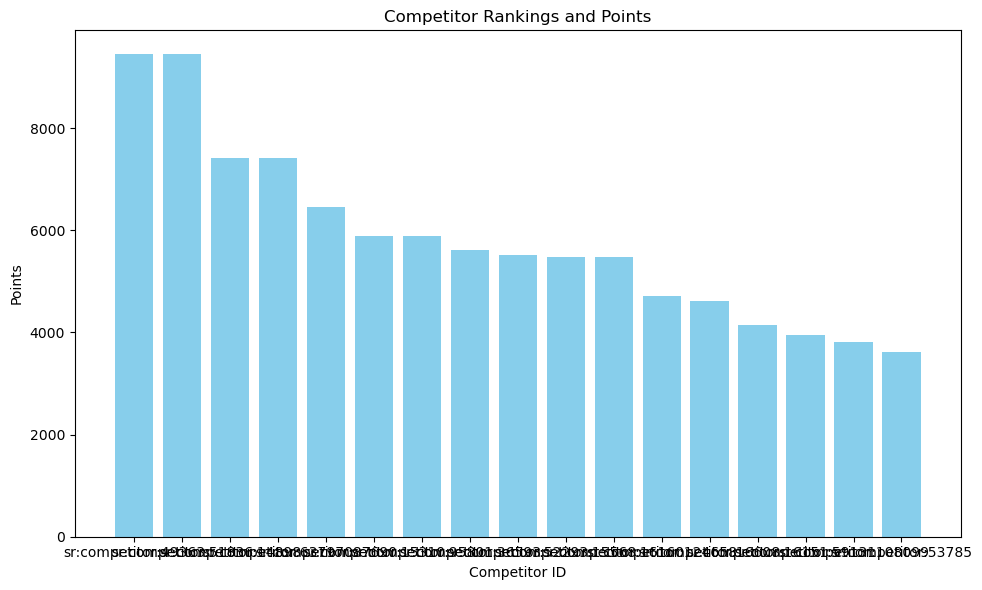

In [20]:
#1)Get all competitors with their rank and points

import matplotlib.pyplot as plt

#SQL query to get competitors with rank and points
cursor.execute('''
    SELECT a.competitor_id, a.ranks, a.points
    FROM competitor_ranking_table a
    JOIN competitors_table b ON a.competitor_id = b.competitor_id
    LIMIT 100;
''')

results = cursor.fetchall()

#Check the first few rows of results to ensure it's fetched properly
print(results[:5])

#Prepare the data for plotting
competitor_ids = [row[0] for row in results]
ranks = [row[1] for row in results]
points = [row[2] for row in results]

#Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(competitor_ids, points, color='skyblue')
plt.xlabel('Competitor ID')
plt.ylabel('Points')
plt.title('Competitor Rankings and Points')

# Display the plot
plt.tight_layout()
plt.show()

In [21]:
#2)Find competitors ranked in the top 5
cursor.execute(
    '''select competitor_id,ranks from competitor_ranking_table order by ranks limit 5

    '''             
)
results = cursor.fetchall()
headers = ["competitor_id", "ranks"]
table = tabulate(results, headers, tablefmt="grid")
print(table)

+---------------------+---------+
| competitor_id       |   ranks |
+=====================+=========+
| sr:competitor:49363 |       1 |
+---------------------+---------+
| sr:competitor:51836 |       1 |
+---------------------+---------+
| sr:competitor:72376 |       1 |
+---------------------+---------+
| sr:competitor:49363 |       1 |
+---------------------+---------+
| sr:competitor:51836 |       1 |
+---------------------+---------+


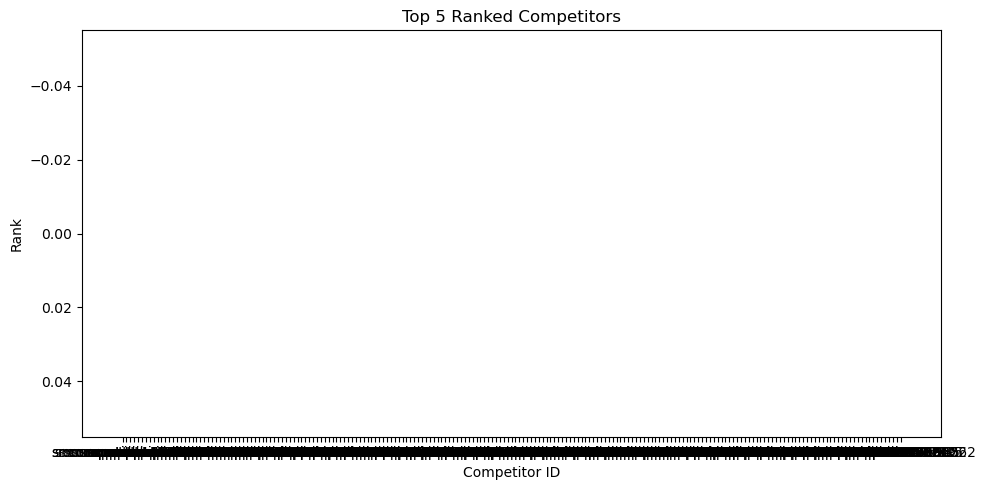

In [ ]:
#Optional: 2)Find competitors ranked in the top 5
#Convert SQL result to DataFrame
df = pd.DataFrame(results, columns=["competitor_id", "ranks"])

#Optional: Reverse rank order for better visualization (rank 1 on top)
df = df.sort_values("ranks", ascending=False)

#Plotting the bar graph
plt.figure(figsize=(10, 5))
plt.bar(df["competitor_id"], df["ranks"], color='tomato')
plt.title("Top 5 Ranked Competitors")
plt.xlabel("Competitor ID")
plt.ylabel("Rank") #Why We Invert the Y-Axis: Since rank 1 is better than rank 5, inverting the y-axis gives a clearer visual hierarchy.
plt.gca().invert_yaxis()  #Lower ranks (1 is top) appear higher
plt.tight_layout()
plt.show()

In [22]:
#3)List competitors with no rank movement (stable rank)
cursor.execute(
    '''select competitor_id,movement from competitor_ranking_table where movement = 0

    '''             
)
results = cursor.fetchall()
headers = ["competitor_id", "movement"]
table = tabulate(results, headers, tablefmt="grid")
print(table)


+-----------------------+------------+
| competitor_id         |   movement |
+=======================+============+
| sr:competitor:49363   |          0 |
+-----------------------+------------+
| sr:competitor:51836   |          0 |
+-----------------------+------------+
| sr:competitor:14898   |          0 |
+-----------------------+------------+
| sr:competitor:637970  |          0 |
+-----------------------+------------+
| sr:competitor:87690   |          0 |
+-----------------------+------------+
| sr:competitor:15310   |          0 |
+-----------------------+------------+
| sr:competitor:95801   |          0 |
+-----------------------+------------+
| sr:competitor:36593   |          0 |
+-----------------------+------------+
| sr:competitor:52293   |          0 |
+-----------------------+------------+
| sr:competitor:15568   |          0 |
+-----------------------+------------+
| sr:competitor:16160   |          0 |
+-----------------------+------------+
| sr:competitor:124658  |

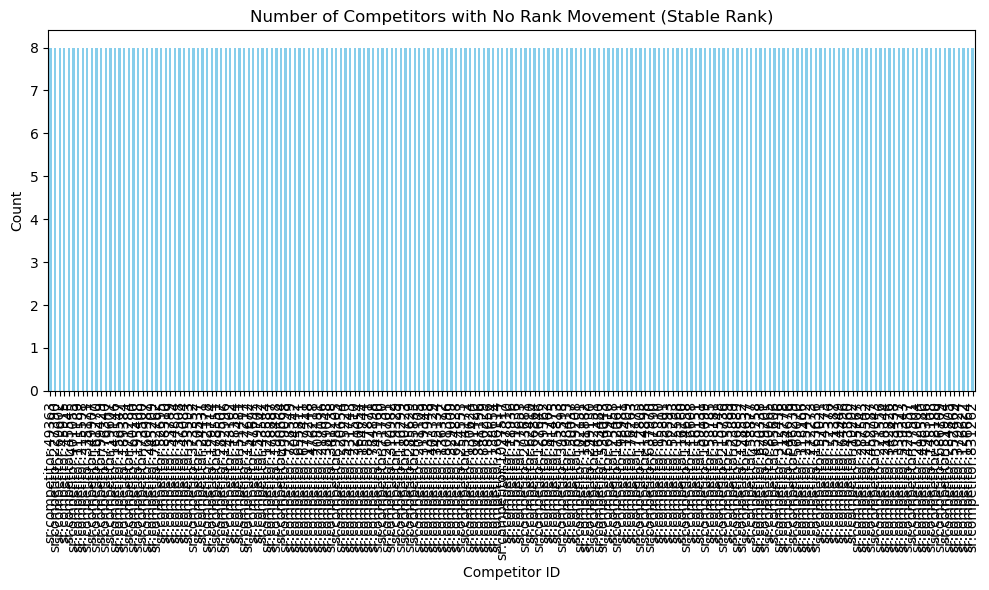

In [ ]:
#Optional: 3)List competitors with no rank movement (stable rank)
#Query competitors with no rank movement (movement = 0)

#Convert the results into a DataFrame for plotting
df = pd.DataFrame(results, columns=["competitor_id", "movement"])

#Plotting the bar graph: Count of competitors with no movement
competitors_no_movement = df["competitor_id"].value_counts()

#Plot the bar graph
plt.figure(figsize=(10, 6))
competitors_no_movement.plot(kind='bar', color='skyblue')
plt.title('Number of Competitors with No Rank Movement (Stable Rank)')
plt.xlabel('Competitor ID')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate competitor IDs for better readability
plt.tight_layout()  # Adjust layout to avoid clipping labels
plt.show()

# Close the cursor and connection after finishing the operations
cursor.close()
conn.close()

In [23]:
#4)Get the total points of competitors from a specific country (e.g., Croatia)

cursor.execute(
    '''select sum(points) as total_points,country from competitor_ranking_table a
join competitors_table b on a.competitor_id = b.competitor_id
group by country
having country = "Croatia"
    '''             
)
results = cursor.fetchall()
headers = ["total_points", "country"]
table = tabulate(results, headers, tablefmt="grid")
print(table)


+----------------+-----------+
|   total_points | country   |
+================+===========+
|         610452 | Croatia   |
+----------------+-----------+


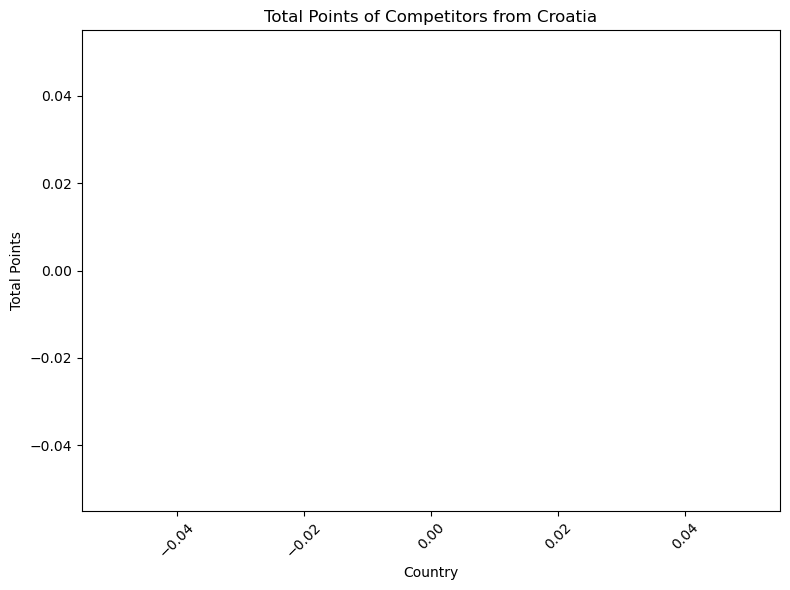

In [42]:
#Optional: 4)Get the total points of competitors from a specific country (e.g., Croatia)

# Convert the results into a DataFrame for plotting
df = pd.DataFrame(results, columns=["total_points", "country"])

# Plotting the bar graph for total points of competitors from Croatia
plt.figure(figsize=(8, 6))
plt.bar(df["country"], df["total_points"], color='green')
plt.title('Total Points of Competitors from Croatia')
plt.xlabel('Country')
plt.ylabel('Total Points')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Close the cursor and connection after finishing the operations
cursor.close()
conn.close()

In [35]:
#5)Count the number of competitors per country
cursor.execute(
    '''select count(b.competitor_id) as total_competitors,country from competitor_ranking_table a
join competitors_table b on a.competitor_id = b.competitor_id
group by country
    '''             
)
results = cursor.fetchall()
headers = ["total_competitors", "country"]
table = tabulate(results, headers, tablefmt="grid")
print(table)

+---------------------+--------------------------+
|   total_competitors | country                  |
+=====================+==========================+
|                  49 | Algeria                  |
+---------------------+--------------------------+
|                  49 | Antigua and Barbuda      |
+---------------------+--------------------------+
|                1421 | Argentina                |
+---------------------+--------------------------+
|                  49 | Armenia                  |
+---------------------+--------------------------+
|                2352 | Australia                |
+---------------------+--------------------------+
|                 539 | Austria                  |
+---------------------+--------------------------+
|                  49 | Belarus                  |
+---------------------+--------------------------+
|                 637 | Belgium                  |
+---------------------+--------------------------+
|                 196 | Bolivia

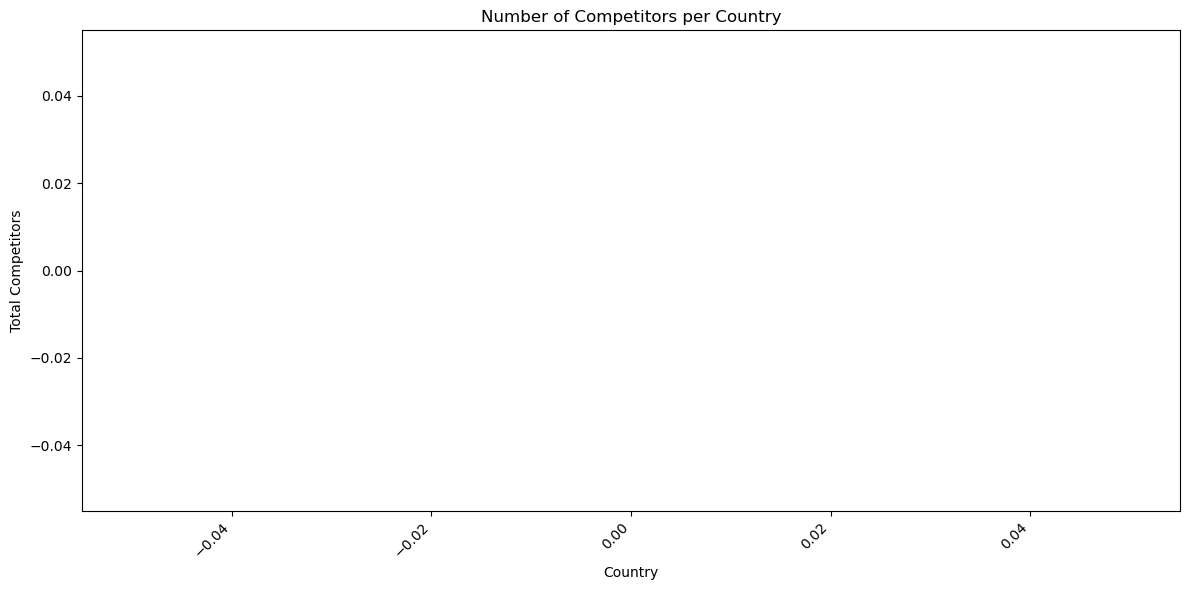

In [ ]:
#Optional: 5)Count the number of competitors per country
df = pd.DataFrame(results, columns=headers)
#Plotting the bar graph
plt.figure(figsize=(12, 6))
plt.bar(df["country"], df["total_competitors"], color='skyblue')
plt.title("Number of Competitors per Country")
plt.xlabel("Country")
plt.ylabel("Total Competitors")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
#6)Find competitors with the highest points in the current week
cursor.execute(
    '''select max(points) as highest_points , week as current_week from competitors_table a join competitor_ranking_table b
on a.competitor_id =b.competitor_id
group by current_week
    '''             
)
results = cursor.fetchall()
headers = ["highest_points", "current_week"]
table = tabulate(results, headers, tablefmt="grid")
print(table)

+------------------+----------------+
|   highest_points |   current_week |
+==================+================+
|            10665 |             15 |
+------------------+----------------+


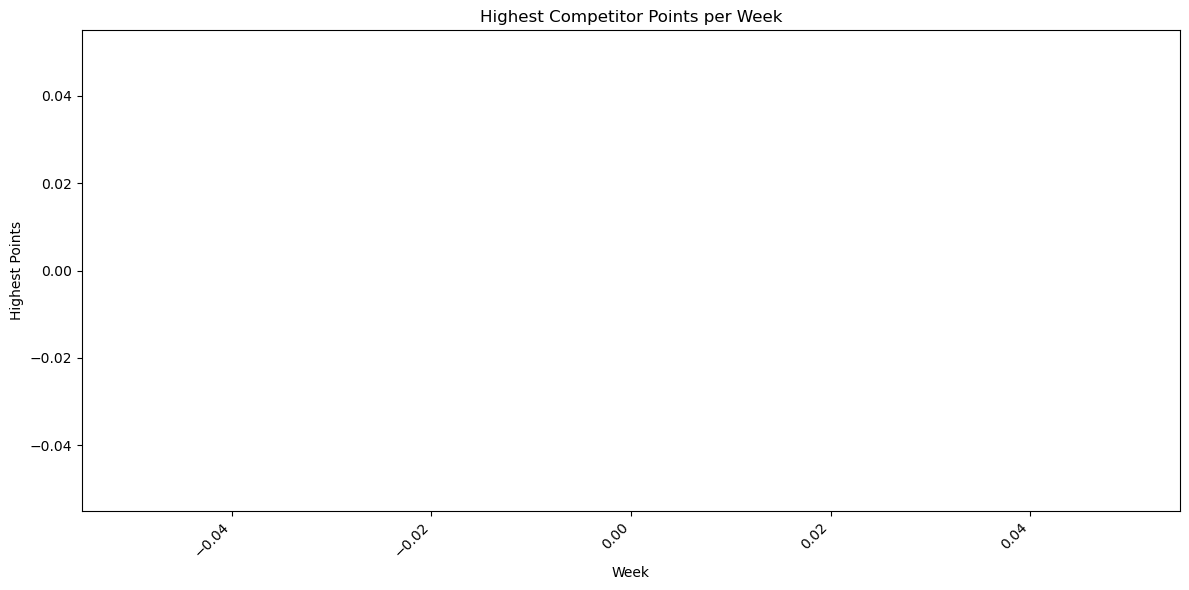

In [41]:
#Optional: 6)Find competitors with the highest points in the current week
#Convert SQL result to DataFrame
df = pd.DataFrame(results, columns=["highest_points", "current_week"])

#Plotting the bar graph
plt.figure(figsize=(12, 6))
plt.bar(df["current_week"], df["highest_points"], color='mediumseagreen')
plt.title("Highest Competitor Points per Week")
plt.xlabel("Week")
plt.ylabel("Highest Points")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()